In [3]:
import matplotlib.pyplot as plt
import os 
import json
import numpy as np

In [4]:
ele_acc = [0.7579,0.7518, 0.7506,0.7310, 0.7348]
ele_auc = [0.8451,0.8398, 0.8350, 0.8098, 0.8305]
print(np.mean(ele_acc), np.std(ele_acc))
print(np.mean(ele_auc), np.std(ele_auc))

0.74522 0.010428882969906236
0.8320399999999999 0.012136984798540371


In [5]:
# dataset_list = ['adult']
dataset_list = ['adult','compas','compass_old','eye_movements_num','eye_movements_cat']
# dataset_list = ['adult','compas','eye_movements_num','eye_movements_cat']
metric_list = ['binary_AUC', 'ACC']

for metric in metric_list:
    plt.figure()
    for dataset in dataset_list:
        fold_best_test_metric = []
        fold_best_train_metric = []
        fold_best_epoch = []
        for fold in range(5):
            path = 'logs/' + dataset + '_' + metric + '_' + str(fold) + '/log.json'
            with open(path, 'r') as f:
                log = json.load(f)
                fold_best_test_metric.append(log['best_test_metric'])
                fold_best_train_metric.append(log['best_train_metric'])
                fold_best_epoch.append(log['best_epoch'])
                # print(log['best_test_metric'])
        print(dataset + '_test_' + metric + ': ' + str(sum(fold_best_test_metric)/5), np.array(fold_best_test_metric).std())    
        # print(dataset + '_train_' + metric + ': ' + str(sum(fold_best_train_metric)/5))    
        # print(dataset + 'best_epoch' + ': ' + str(sum(fold_best_epoch)/5))    
        
        
        # plt.bar(x = dataset + '_' + metric, height=sum(fold_best_test_metric)/5)
        # plt.legend()
        # plt.plot(fold_best_test_metric, label = dataset + '_' + metric)

adult_test_binary_AUC: 0.9140280877664487 0.0029781729115994477
compas_test_binary_AUC: 0.7206121431929402 0.023478747753312698
compass_old_test_binary_AUC: 0.729134871566082 0.008975081809194613
eye_movements_num_test_binary_AUC: 0.6123181128698102 0.007647901398661103
eye_movements_cat_test_binary_AUC: 0.6176295233297339 0.008711697485668898
adult_test_ACC: 0.839004921913147 0.027435883559914515
compas_test_ACC: 0.6682926893234253 0.022390955665922623
compass_old_test_ACC: 0.6738267064094543 0.00590570697753063
eye_movements_num_test_ACC: 0.5853174567222595 0.01011711037356196
eye_movements_cat_test_ACC: 0.590079379081726 0.011458410285538784


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
# dataset_list = ['adult']
dataset_list = ['credit']
# dataset_list = ['adult','compas','eye_movements_num','eye_movements_cat']
metric_list = ['binary_AUC', 'ACC']

for a,metric in enumerate(metric_list):
    plt.figure()
    for dataset in dataset_list:
        for i in range(2):
            fold_best_test_metric = []
            fold_best_train_metric = []
            fold_best_epoch = []
            for fold in range(5):
                path = 'logs/' + dataset + '_' + metric + '_' + str(fold) + '/log.json'
                with open(path, 'r') as f:
                    log = json.load(f)
                    fold_best_test_metric.append(log[i]['best_test_metric'])
                    fold_best_train_metric.append(log[i]['best_train_metric'])
                    fold_best_epoch.append(log[i]['best_epoch'])
                    # print(log['best_test_metric'])
            print(dataset + '_test_' + str(i) + ': ' + str(sum(fold_best_test_metric)/5), np.array(fold_best_test_metric).std())    
            # print(dataset + '_train_' + metric + ': ' + str(sum(fold_best_train_metric)/5))    
            # print(dataset + 'best_epoch' + ': ' + str(sum(fold_best_epoch)/5))    
            
            
            # plt.bar(x = dataset + '_' + metric, height=sum(fold_best_test_metric)/5)
            # plt.legend()
            # plt.plot(fold_best_test_metric, label = dataset + '_' + metric)

credit_test_0: 0.7119304656982421 0.060183606347494534
credit_test_1: 0.8216767346850297 0.013543290243639998
credit_test_0: 0.69622300863266 0.06056835832585738
credit_test_1: 0.821225485981171 0.011758625405947173


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [7]:
dataset name	adult	compas-two-years	compass_old	eye_movements_num	eye_movements_cat	credit	electricity_cat
n_samples	48843	4966	16644	7608	7608	16714.0	38474
n_num_field	6	3	8	20	20	10	7
n_cat_field	8	7	8	0	3	0	1
XGBOOST AUC	0.9251	0.6920	0.8395	0.7267	0.7318	0.8343	0.9769
RF AUC	0.9096	0.6647	0.8626	0.7106	0.7202	0.8467	0.9676
our’s AUC	0.9140	0.7206	0.7291	0.6123	0.6181	0.8217	++
GRAPE’s AUC	0.8646	0.7019	0.7355	0.6171	0.6230	0.7841	0.8234
XGBOOST ACC	0.8694	0.6460	0.7626	0.6630	0.6671	0.7603	0.9236
RF ACC	0.8588	0.6174	0.7883	0.6492	0.6534	0.7701	0.9025
our’s ACC	0.8446	0.6683	0.6738	0.5853	0.5901	0.5866 (0.7639)	++
GRAPE’s ACC	0.8368	0.6452	0.6594	0.5810	0.5833	0.6995	0.7250

SyntaxError: invalid character '’' (U+2019) (657601335.py, line 7)

In [8]:
print('AUC',[np.array([0.8694, 0.8699, 0.8545, 0.8613, 0.8689]).std()
            ,np.array([0.7081, 0.7028, 0.7040, 0.7021, 0.6925]).std()
            ,np.array([0.7391, 0.7282, 0.7343, 0.7320, 0.7444]).std()
            ,np.array([0.6084, 0.6075, 0.6264, 0.6170, 0.6262]).std()
            ,np.array([0.6170, 0.6220, 0.6284, 0.6339, 0.6139]).std()
            ,np.array([0.7743, 0.7859, 0.7891, 0.7793, 0.7921]).std()
            ,np.array([0.8301, 0.8205, 0.8159, 0.8256, 0.8248]).std()])
print('ACC',[np.array([0.8389, 0.8419, 0.8295, 0.8357, 0.8380]).std()
            ,np.array([0.6589, 0.6478, 0.6338, 0.6338, 0.6519]).std()
            ,np.array([0.6625, 0.6523, 0.6559, 0.6571, 0.6691]).std()
            ,np.array([0.5713, 0.5733, 0.5858, 0.5884, 0.5864]).std()
            ,np.array([0.5851, 0.5792, 0.5871, 0.5996, 0.5654]).std()
            ,np.array([0.6993, 0.6957, 0.7035, 0.6903, 0.7085]).std()
            ,np.array([0.7345, 0.7181, 0.7166, 0.7300, 0.7256]).std()])

AUC [0.006038542870593852, 0.005139260647213742, 0.005640921910468179, 0.008211698971589219, 0.007318087181770931, 0.006500953776177787, 0.004823857377659498]
ACC [0.004155959576319275, 0.009992517200385501, 0.005859146695552181, 0.007215705093752095, 0.011140807870168119, 0.006262778935903775, 0.006837718917884837]


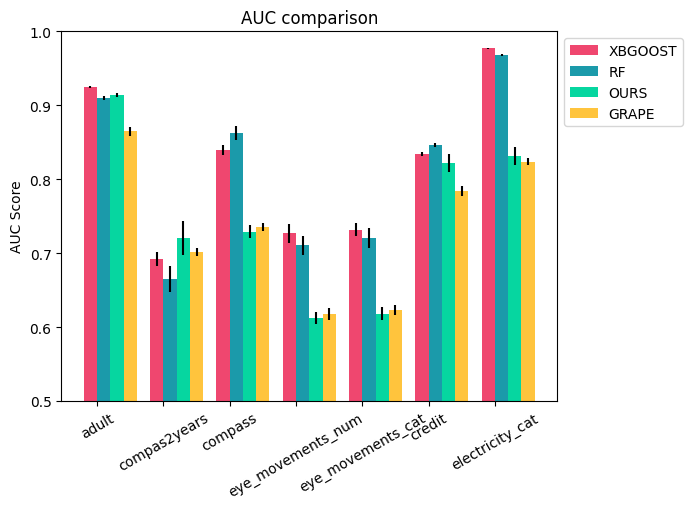

In [9]:
import numpy as np
import matplotlib.pyplot as plt
categories = ['adult','compas2years','compass','eye_movements_num','eye_movements_cat','credit','electricity_cat']
XBGOOST = [0.9251,0.6920,	0.8395,	0.7267,	0.7318,	0.8343,	0.9769]
RF = [0.9096,0.6647,0.8626,0.7106,0.7202,0.8467,0.9676]
OURS = [0.9140,0.7206,0.7291,0.6123,0.6181,0.8217,0.8320]
GRAPE = [0.8646	,0.7019	,0.7355,0.6171,0.6230,0.7841,0.8234]
errors_XGB = [0.0016453764633771102,0.009556797109409446,0.007344747198552351,0.012747241794519172,0.008667763313872074,0.0025857263301836946,0.0008141342439175266]
errors_RF = [0.0024182138188876936,0.01761978998627694,0.008973069385019763,0.013094647664691294,0.01322333732384981,0.0027457881899312655,0.0012111345908354166]
errors_OURS = [0.0029781729115994477,0.023478747753312698,0.008975081809194613,0.007647901398661103,0.008711697485668898,0.011758625405947173,0.012136984798540371]
errors_GRAPE = [0.006038542870593852, 0.005139260647213742, 0.005640921910468179, 0.008211698971589219, 0.007318087181770931, 0.006500953776177787, 0.004823857377659498]
x = np.arange(len(categories))
width = 0.2
plt.bar(x, XBGOOST, width,  yerr=errors_XGB, color='#EF476F', label='XBGOOST')
plt.bar(x + width, RF, width,  yerr=errors_RF, color='#1B9AAA', label='RF')
plt.bar(x + width*2, OURS, width,  yerr=errors_OURS, color='#06D6A0', label='OURS')
plt.bar(x + width*3, GRAPE, width,  yerr=errors_GRAPE, color='#FFC43D', label='GRAPE')
plt.xticks(x + width / 2, categories, rotation=30)
plt.ylim(0.5,1)
plt.ylabel('AUC Score')
plt.title('AUC comparison')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

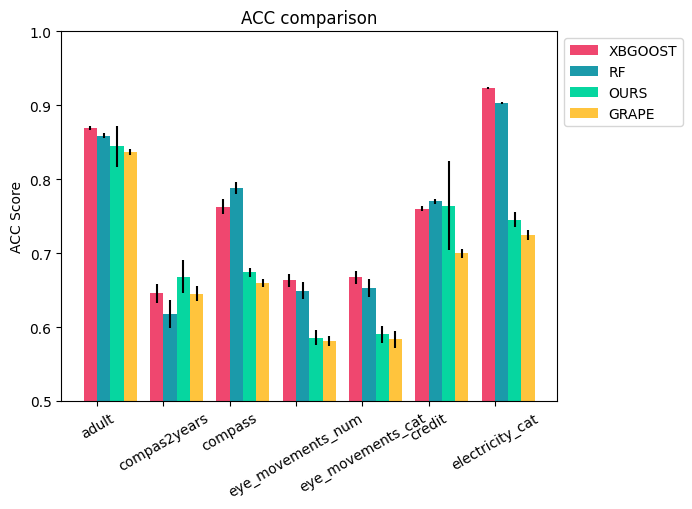

In [10]:
import numpy as np
import matplotlib.pyplot as plt
categories = ['adult','compas2years','compass','eye_movements_num','eye_movements_cat','credit','electricity_cat']

XBGOOST = [0.8694,0.6460,0.7626,0.6630,0.6671,0.7603,0.9236]
RF = [0.8588,0.6174,0.7883,0.6492,0.6534,0.7701,0.9025]
OURS = [0.8446,0.6683,0.6738,0.5853,0.5901,0.7639,0.7452]
GRAPE = [0.8368,0.6452,0.6594,0.5810,0.5833,0.6995,0.7250]
errors_XGB = [0.0025551938986158175,0.012894349612194335,0.010243521106576028,0.009200386120583834,0.009122060156581138,0.003736398984400591,0.0016544157934634534]
errors_RF = [0.003582220319882403,0.01909247926254223,0.008572348191622291,0.011839727512339528,0.01226152886597507,0.0036197304969069013,0.0013597913226146858]
errors_OURS = [0.027435883559914515,0.022390955665922623,0.00590570697753063,0.01011711037356196,0.011458410285538784,0.060183606347494534,0.010428882969906236]
errors_GRAPE = [0.004155959576319275, 0.009992517200385501, 0.005859146695552181, 0.007215705093752095, 0.011140807870168119, 0.006262778935903775, 0.006837718917884837]
x = np.arange(len(categories))
width = 0.2
plt.bar(x, XBGOOST, width,  yerr=errors_XGB, color='#EF476F', label='XBGOOST')
plt.bar(x + width, RF, width,  yerr=errors_RF, color='#1B9AAA', label='RF')
plt.bar(x + width*2, OURS, width,  yerr=errors_OURS, color='#06D6A0', label='OURS')
plt.bar(x + width*3, GRAPE, width,  yerr=errors_GRAPE, color='#FFC43D', label='GRAPE')
plt.xticks(x + width / 2, categories, rotation=30)
plt.ylim(0.5,1)
plt.ylabel('ACC Score')
plt.title('ACC comparison')
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [ ]:
a = [0.8301, 0.8205 ,0.8159, 0.8256, 0.8248]
a = [0.7345, 0.7181, 0.7166, 0.7300 ,0.7256]
sum(a)/5

0.72496